In [ ]:
#!pip install fbprophet

In [1]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pandas as pd

In [2]:
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [3]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

## Read Data: SP500

In [5]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [6]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

In [7]:
query = '''
select * from SP500
'''

data = pd.read_sql(query, conn)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469,1478,1438,1455,1455,931800000
1,2000-01-04,1455,1455,1397,1399,1399,1009000000
2,2000-01-05,1399,1413,1378,1402,1402,1085500000
3,2000-01-06,1402,1412,1392,1403,1403,1092300000
4,2000-01-07,1403,1441,1401,1441,1441,1225200000


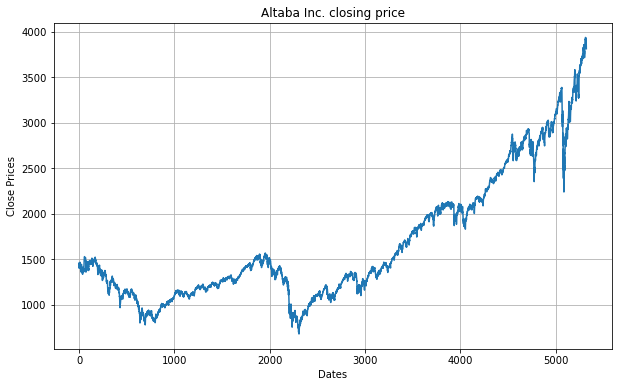

In [8]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Altaba Inc. closing price')
plt.show()

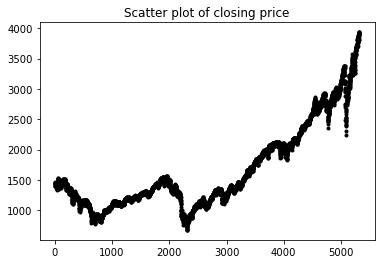

In [9]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

## build the predictive model

In [10]:
data = data[['Date', 'Close']]

data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2000-01-03,1455
1,2000-01-04,1399
2,2000-01-05,1402
3,2000-01-06,1403
4,2000-01-07,1441


In [12]:
from fbprophet import Prophet

In [13]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [17]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
#prediction.to_csv("predict_sp500.csv")

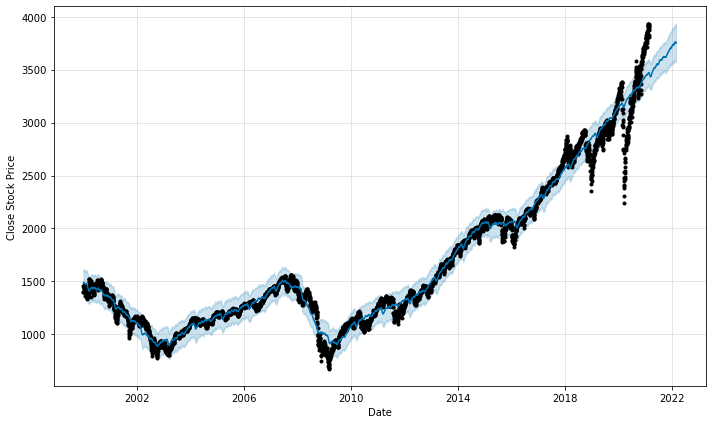

In [20]:
figure = m.plot(prediction)
#plt.title("Prediction of the SP500 Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
figure.savefig(f'../plots/sp500_figure.png')

In [ ]:
m.plot_components(prediction)
plt.show()

In [ ]:
sp_png = pd.read_png("../plots/AAPL_figure.png")
sp_png

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('../plots/AAPL_figure.png')
img